In [202]:
# load required libraries.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from scipy.stats import zscore

In [203]:
# read file
data = pd.read_csv("Data_regression.csv")
data.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [204]:
data.shape  # get the shape

(932, 9)

In [205]:
data.info()  # get the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      919 non-null    float64
 1   Market_dist    919 non-null    float64
 2   Hospital_dist  931 non-null    float64
 3   Carpet_area    924 non-null    float64
 4   Builtup_area   917 non-null    float64
 5   Parking_type   932 non-null    object 
 6   City_type      932 non-null    object 
 7   Rainfall       932 non-null    int64  
 8   Price_house    932 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.7+ KB


In [206]:
data["Market_dist"].fillna(data["Market_dist"].mean(), inplace=True)   # handling missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      919 non-null    float64
 1   Market_dist    932 non-null    float64
 2   Hospital_dist  931 non-null    float64
 3   Carpet_area    924 non-null    float64
 4   Builtup_area   917 non-null    float64
 5   Parking_type   932 non-null    object 
 6   City_type      932 non-null    object 
 7   Rainfall       932 non-null    int64  
 8   Price_house    932 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.7+ KB


In [207]:
data.describe()   # get basic statistics

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house
count,919.000000,932.000000,931.000000,924.000000,917.000000,932.000000,9.320000e+02
mean,8229.727965,11018.752992,13072.092374,1511.862554,1794.924755,785.579399,6.084695e+06
std,2561.985008,2526.097159,2586.456161,790.969660,468.159457,265.546853,5.025364e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,3.000000e+04
25%,6476.000000,9371.750000,11301.500000,1318.000000,1583.000000,600.000000,4.658000e+06
50%,8230.000000,11112.000000,13163.000000,1480.500000,1774.000000,780.000000,5.866000e+06
75%,9937.000000,12653.000000,14817.000000,1655.000000,1982.000000,970.000000,7.187250e+06
max,20662.000000,20945.000000,23294.000000,24300.000000,12730.000000,1560.000000,1.500000e+08


In [263]:
X = data["Market_dist"].values.reshape(-1,1)   # reshaping 
y = data["Price_house"].values.reshape(-1,1)

X.dtype

dtype('float64')

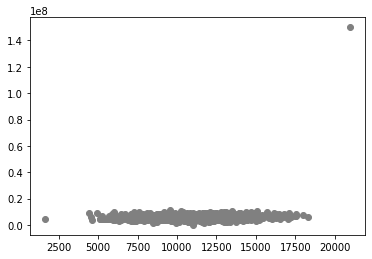

In [235]:
plt.scatter(X, y, color='gray')  # scatter plot
plt.show()

In [236]:
zs_md = zscore(X)               # z-score for detecting outliers
zs_md = zs_md.reshape(-1,1)
zs_md.shape

(932, 1)

In [241]:
zs_hp = zscore(y)              # z-score for detecting outliers
zs_hp = zs_hp.reshape(-1,1)
zs_hp.shape

(932, 1)

In [242]:
# create new DataFrame
table = pd.DataFrame({'House Price': y.flatten(), 'Market Distance': X.flatten(), 'Z_Score_md': zs_md.flatten(), 'Z_Score_hp': zs_hp.flatten()})
table

,House Price,Market Distance,Z_Score_md,Z_Score_hp
0,6649000,5250.0,-2.284888,0.112352
1,3982000,8186.0,-1.121997,-0.418641
2,5401000,14399.0,1.338849,-0.136122
3,5373000,11188.0,0.067035,-0.141697
4,4662000,12629.0,0.637787,-0.283255
...,...,...,...,...
927,6639000,8518.0,-0.990499,0.110361
928,8208000,8717.0,-0.911679,0.422744
929,7644000,11708.0,0.272997,0.310454
930,9661000,14700.0,1.458069,0.712033


In [243]:
# detected outliers
table.loc[(table["Z_Score_md"] > 3) | (table["Z_Score_md"] < -3) | (table["Z_Score_hp"] > 3) | (table["Z_Score_hp"] < -3)]

,House Price,Market Distance,Z_Score_md,Z_Score_hp
360,150000000,20945.0,3.931589,28.653164
854,4759000,1666.0,-3.704440,-0.263942


In [244]:
# drop columns which has outliers.
table.drop((table[(table['Z_Score_md']>3) | (table['Z_Score_md']<-3) | (table['Z_Score_hp']>3) | (table['Z_Score_hp']<-3)].index), inplace=True)

In [245]:
# again outlier detection for verification only
table.loc[(table["Z_Score_md"] > 3) | (table["Z_Score_md"] < -3) | (table["Z_Score_hp"] > 3) | (table["Z_Score_hp"] < -3)]

,House Price,Market Distance,Z_Score_md,Z_Score_hp


In [249]:
X1 = table['Market Distance'].values.reshape(-1,1)
y1 = table['House Price'].values.reshape(-1,1)
X1.shape

(930, 1)

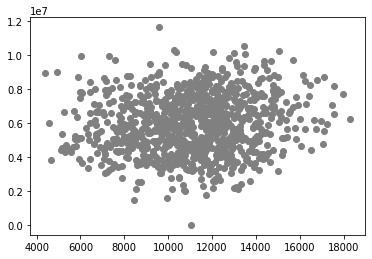

In [250]:
plt.scatter(X1, y1, color='gray')
plt.show()

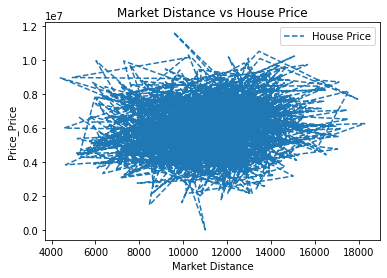

In [252]:
table.plot(x="Market Distance", y="House Price", style="--")
plt.title("Market Distance vs House Price")
plt.xlabel("Market Distance")
plt.ylabel("Price_Price")
plt.show()

In [253]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=41)

In [254]:
regression = LinearRegression()
regression.fit(X_train, y_train)  # training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [255]:
#print intercept
print(regression.intercept_)

#print slope
print(regression.coef_)

[4970055.64541108]
[[84.44514718]]


In [256]:
y_pred = regression.predict(X_test)

In [257]:
# comparison between predicted data & actual data.

df = pd.DataFrame({'Actual Data': y_test.flatten(), 'Predicted Data': y_pred.flatten()})
df

,Actual Data,Predicted Data
0,5517000,6.414152e+06
1,6603000,5.728795e+06
2,8037000,5.851325e+06
3,6649000,5.413393e+06
4,7895000,5.995389e+06
...,...,...
181,7688000,5.900536e+06
182,3616000,5.905032e+06
183,7624000,6.184968e+06
184,6205000,5.835112e+06


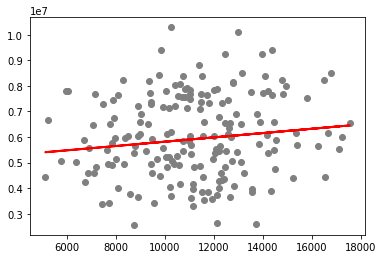

In [258]:
# plot straight line with the test data.

plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.show()

In [259]:
# get different metrics from y_test and y_pred

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 1346653.4494788605
Mean Squared Error: 2614186512987.9253
Root Mean Squared Error: 1160.4539842143076
